In [10]:
from scipy.io import loadmat

data_set = loadmat("Liu_dataset.mat")

In [11]:
print(data_set.keys())

dict_keys(['__header__', '__version__', '__globals__', 'side_effect', 'chemical', 'Targets', 'Transporters', 'Enzymes', 'Pathways', 'Treatment', 'Other_side_effects'])


In [42]:
rows = data_set['Treatment']

In [44]:
count = 0
for  i in rows:
    count += 1
    #print (i)
print (count)

832


In [80]:
side_effect = data_set['side_effect']
chemical = data_set['chemical']
Targets = data_set['Targets']
Transporters = data_set['Transporters']
Enzymes = data_set['Enzymes']
Pathways = data_set['Pathways']
Treatment = data_set['Treatment']
Other_side_effects = data_set['Other_side_effects']

In [122]:
for i in Other_side_effects:
    print (len(i))

1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385
1385


In [108]:
len(side_effect)

832

In [819]:
side_effect_df = pd.DataFrame(data = side_effect)
chemical_df = pd.DataFrame(data = chemical)
Targets_df = pd.DataFrame(data = Targets)
Transporters_df = pd.DataFrame(data = Transporters)
Enzymes_df = pd.DataFrame(data = Enzymes)
Pathways_df = pd.DataFrame(data = Pathways)
Treatment_df = pd.DataFrame(data = Treatment)

In [820]:
side_effect_df.columns=["SE"+str(i) for i in range(1, 1386)]

In [821]:
side_effect_df

,SE1,SE2,SE3,SE4,SE5,SE6,SE7,SE8,SE9,SE10,...,SE1376,SE1377,SE1378,SE1379,SE1380,SE1381,SE1382,SE1383,SE1384,SE1385
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
828,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
830,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [822]:
drug_to_SE_matrix = pd.DataFrame(columns=['drug', 'SE'])

In [823]:
drug_to_SE_matrix

,drug,SE


In [824]:
drug_to_SE_matrix = pd.DataFrame(columns=['drug', 'SE'])
#create a matrix of drugs-to-se
#two columns: drugs labeled 0-831, SE labeled SE1-SE1385
for i in range (1, 1386):
    column = 'SE'+str(i)
    count = 0
    for j in side_effect_df[column]:
        if j == 1:
            add = pd.DataFrame({'drug':[count], 'SE':[column]})
            drug_to_SE_matrix = pd.concat([drug_to_SE_matrix, add], axis=0)
        count += 1

In [279]:
drug_to_SE_matrix.to_csv('drug_to_SE_matrix.csv')

In [284]:
drug_to_SE_matrix

,drug,SE
0,7,SE1
0,30,SE1
0,33,SE1
0,35,SE1
0,39,SE1
...,...,...
0,749,SE1383
0,773,SE1383
0,776,SE1383
0,542,SE1384


In [302]:
for index, row in drug_to_SE_matrix.iterrows():
    print (row['SE'][-1])

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
7
7
7
7
7
7
7
7


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
0
0
0
1
1
1
1
1
1
1
1
1
2
2
2
2
2
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9

KeyboardInterrupt: 

In [306]:
count_of_SE = {}
keys = count_of_SE.keys()
for index, row in drug_to_SE_matrix.iterrows():
    if row['SE'] in keys:
        count_of_SE[row['SE']] += 1
    else:
        count_of_SE[row['SE']] = 1

In [314]:
selected_SE = []
for i in count_of_SE:
    if count_of_SE[i] > 50:
        selected_SE.append(i)

In [316]:
selected_SE

['SE1',
 'SE2',
 'SE3',
 'SE7',
 'SE9',
 'SE20',
 'SE21',
 'SE28',
 'SE30',
 'SE31',
 'SE33',
 'SE36',
 'SE37',
 'SE38',
 'SE39',
 'SE48',
 'SE50',
 'SE52',
 'SE54',
 'SE60',
 'SE64',
 'SE68',
 'SE69',
 'SE75',
 'SE77',
 'SE79',
 'SE82',
 'SE84',
 'SE85',
 'SE96',
 'SE101',
 'SE109',
 'SE111',
 'SE114',
 'SE121',
 'SE122',
 'SE124',
 'SE138',
 'SE146',
 'SE151',
 'SE158',
 'SE159',
 'SE170',
 'SE174',
 'SE177',
 'SE178',
 'SE179',
 'SE180',
 'SE181',
 'SE183',
 'SE190',
 'SE195',
 'SE196',
 'SE199',
 'SE200',
 'SE202',
 'SE203',
 'SE204',
 'SE208',
 'SE209',
 'SE212',
 'SE218',
 'SE225',
 'SE226',
 'SE228',
 'SE230',
 'SE237',
 'SE239',
 'SE240',
 'SE241',
 'SE242',
 'SE244',
 'SE245',
 'SE247',
 'SE250',
 'SE251',
 'SE264',
 'SE267',
 'SE275',
 'SE276',
 'SE278',
 'SE284',
 'SE286',
 'SE296',
 'SE301',
 'SE310',
 'SE312',
 'SE322',
 'SE323',
 'SE324',
 'SE325',
 'SE327',
 'SE328',
 'SE334',
 'SE336',
 'SE339',
 'SE342',
 'SE345',
 'SE347',
 'SE350',
 'SE351',
 'SE353',
 'SE355',
 'SE3

In [320]:
for index, row in drug_to_SE_matrix.iterrows():
    if row['SE'] not in selected_SE:
        drug_to_SE_matrix.drop()

SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE1
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE2
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3
SE3


SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE37
SE38
SE38
SE38
SE38
SE38
SE38
SE38
SE38
SE38
SE38
SE38
SE38
SE38
SE38
SE38


SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64
SE64


SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE85
SE86
SE86
SE86
SE86
SE86
SE86
SE86
SE86
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE87
SE88
SE88
SE88
SE88
SE88
SE88
SE88
SE88
SE88
SE88
SE88
SE89
SE89
SE89
SE89
SE89
SE89
SE89
SE89
SE89
SE89
SE90
SE90
SE90
SE90
SE90
SE90
SE91
SE92
SE92
SE92
SE92
SE93
SE94
SE94
SE95
SE95
SE95
SE96
SE96
SE96


SE156
SE157
SE157
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE158
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE159
SE160
SE160
SE160
SE161
SE162
SE162
SE162
SE163
SE163
SE163
SE163
SE163
SE164
SE165
SE165
SE165
SE165
SE166
SE167
SE167
SE167
SE167
SE167
SE167
SE167
SE167
SE168
SE168
SE168
SE169
SE169
SE169
SE170
SE170
SE170
SE170
SE170
SE170
SE170
SE170
SE170
SE170
SE170
SE170
SE170
SE170
SE170
SE170
SE170
SE170
SE170
SE170
SE170
SE17

SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE188
SE189
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE190
SE19

SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE209
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE210
SE211
SE211
SE211
SE211
SE211
SE211
SE211
SE211
SE211
SE211
SE211
SE211
SE211
SE211
SE211
SE211
SE211
SE211
SE211
SE211
SE211
SE211
SE211
SE212
SE212
SE212
SE212
SE212
SE212
SE212
SE212
SE212
SE212
SE212
SE212
SE212
SE212
SE212
SE212
SE212
SE212
SE212
SE212
SE212
SE212
SE212
SE212
SE21

SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE228
SE22

SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE242
SE24

SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE275
SE27

SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE301
SE30

SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE327
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE328
SE329
SE329
SE329
SE329
SE329
SE329
SE330
SE331
SE332
SE332
SE332
SE332
SE332
SE332
SE332
SE333
SE333
SE333
SE333
SE333
SE333
SE333
SE333
SE333
SE333
SE333
SE334
SE334
SE334
SE334
SE334
SE334
SE33

SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE350
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE351
SE352
SE352
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE353
SE35

SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE389
SE390
SE390
SE390
SE391
SE391
SE391
SE391
SE391
SE391
SE391
SE391
SE391
SE392
SE392
SE392
SE392
SE392
SE393
SE394
SE394
SE394
SE394
SE394
SE394
SE394
SE394
SE394
SE394
SE394
SE394
SE394
SE394
SE394
SE394
SE394
SE394
SE394
SE394
SE395
SE395
SE395
SE395
SE395
SE395
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE396
SE39

SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE430
SE43

SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE459
SE45

SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE496
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE497
SE498
SE499
SE500
SE500
SE500
SE500
SE500
SE500
SE500
SE500
SE500
SE500
SE500
SE500
SE500
SE500
SE500
SE500
SE500
SE500
SE500
SE500
SE500
SE500
SE500
SE501
SE501
SE501
SE501
SE502
SE502
SE503
SE503
SE503
SE504
SE504
SE504
SE504
SE504
SE504
SE504
SE504
SE504
SE504
SE504
SE505
SE505
SE505
SE505
SE506
SE506
SE507
SE507
SE507
SE507
SE507
SE507
SE507
SE507
SE507
SE507
SE507
SE507
SE507
SE507
SE507
SE507
SE507
SE507
SE507
SE507
SE507
SE50

SE570
SE570
SE571
SE572
SE572
SE572
SE572
SE572
SE572
SE572
SE572
SE572
SE572
SE572
SE572
SE572
SE572
SE573
SE574
SE574
SE574
SE575
SE575
SE575
SE575
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE576
SE57

SE608
SE608
SE608
SE608
SE608
SE608
SE608
SE608
SE608
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE609
SE60

SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE652
SE65

SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE689
SE68

SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE742
SE743
SE743
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE744
SE745
SE745
SE745
SE745
SE745
SE745
SE745
SE745
SE745
SE745
SE745
SE745
SE745
SE74

SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE798
SE799
SE799
SE799
SE799
SE799
SE799
SE800
SE800
SE800
SE800
SE800
SE800
SE800
SE800
SE800
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE801
SE80

SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE844
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE845
SE84

SE863
SE863
SE863
SE863
SE863
SE863
SE863
SE863
SE863
SE863
SE863
SE863
SE863
SE863
SE863
SE863
SE863
SE863
SE863
SE863
SE863
SE865
SE865
SE865
SE865
SE865
SE865
SE866
SE866
SE866
SE866
SE866
SE867
SE867
SE867
SE868
SE868
SE868
SE868
SE868
SE868
SE868
SE868
SE868
SE869
SE869
SE870
SE870
SE870
SE871
SE872
SE873
SE873
SE873
SE873
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE874
SE87

SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE901
SE902
SE902
SE903
SE903
SE903
SE903
SE903
SE903
SE903
SE903
SE90

SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE920
SE92

SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE948
SE949
SE949
SE949
SE950
SE950
SE950
SE950
SE951
SE951
SE952
SE952
SE952
SE952
SE952
SE952
SE952
SE952
SE952
SE952
SE952
SE952
SE952
SE952
SE952
SE952
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE953
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE954
SE95

SE1021
SE1021
SE1021
SE1021
SE1022
SE1022
SE1022
SE1023
SE1023
SE1023
SE1023
SE1023
SE1023
SE1023
SE1023
SE1023
SE1024
SE1025
SE1025
SE1025
SE1025
SE1025
SE1025
SE1025
SE1025
SE1025
SE1025
SE1025
SE1025
SE1025
SE1025
SE1025
SE1025
SE1025
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1026
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1027
SE1028
SE1028
SE1028
SE1028
SE1028
SE1028
SE1028
SE1028
SE1028
SE1028
SE1028
SE1028
SE1028
SE1028
SE1028

SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118
SE1118

SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1250
SE1251
SE1252
SE1253
SE1253
SE1253
SE1253
SE1253
SE1253
SE1253
SE1253
SE1253
SE1254
SE1254
SE1254
SE1254
SE1254
SE1254
SE1254
SE1254
SE1254
SE1254
SE1254
SE1254
SE1254
SE1254
SE1254
SE1254
SE1254
SE1254
SE1254
SE1254
SE1254
SE1254
SE1254

SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1322
SE1323
SE1323
SE1323
SE1324
SE1324
SE1325
SE1325
SE1325
SE1325
SE1325
SE1325
SE1325
SE1325
SE1325
SE1325
SE1325
SE1325
SE1325
SE1325
SE1325
SE1325
SE1325
SE1325
SE1325
SE1325
SE1325
SE1325
SE1325

SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379
SE1379

In [287]:
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import centrality
from networkx.algorithms import distance_measures
from networkx.algorithms import shortest_paths
from networkx.algorithms import components
from networkx.algorithms import isolates
from networkx.classes import function
import matplotlib.pyplot as plt
import math
import csv
import pandas as pd
import networkx as nx

G = nx.Graph()
G.add_nodes_from(drug_to_SE_matrix['drug'], bipartite='drug')
G.add_nodes_from(drug_to_SE_matrix['SE'], bipartite='SE')
G.add_edges_from(zip(drug_to_SE_matrix['drug'], drug_to_SE_matrix['SE'])) 

In [288]:
N, K = G.order(), G.size()
avg_deg = float(K) / N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  2213
Edges:  59205
Average degree:  26.75327609579756


In [289]:
drug_nodes = [n for n in G.nodes() if G.nodes[n]['bipartite'] == 'drug'] 
SE_nodes = [n for n in G.nodes() if G.nodes[n]['bipartite'] == 'SE'] 

In [290]:
len(drug_nodes)

832

In [291]:
G_drug = nx.algorithms.bipartite.projection.weighted_projected_graph(G, drug_nodes)

In [292]:
N, K = G_drug.order(), G_drug.size()
avg_deg = float(K) / N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  832
Edges:  332806
Average degree:  400.00721153846155


In [294]:
degree_centrality = list((nx.algorithms.centrality.degree_centrality(G_drug)).values())

In [295]:
degree_centrality

[0.9939831528279182,
 0.9891696750902528,
 0.9987966305655837,
 0.996389891696751,
 0.9759326113116727,
 0.9903730445246691,
 0.9831528279181709,
 0.9903730445246691,
 0.9891696750902528,
 0.9903730445246691,
 0.9783393501805054,
 0.9927797833935018,
 0.9783393501805054,
 0.9879663056558364,
 0.910950661853189,
 0.8832731648616126,
 0.98676293622142,
 0.9783393501805054,
 0.9470517448856799,
 0.9855595667870036,
 0.9939831528279182,
 0.8784596871239471,
 0.9795427196149218,
 0.9831528279181709,
 0.9975932611311673,
 0.9879663056558364,
 0.9915764139590855,
 0.9915764139590855,
 0.9855595667870036,
 0.9723225030084236,
 0.9771359807460891,
 0.9819494584837546,
 0.9903730445246691,
 0.9939831528279182,
 0.9951865222623346,
 0.9915764139590855,
 0.9855595667870036,
 0.98676293622142,
 0.97352587244284,
 0.9891696750902528,
 0.9843561973525873,
 0.9915764139590855,
 0.9951865222623346,
 0.996389891696751,
 0.9903730445246691,
 0.8423586040914561,
 0.9446450060168472,
 0.9687123947051746,
 

In [155]:
features = pd.concat([chemical_df, Targets_df, Transporters_df, Enzymes_df, Pathways_df, Treatment_df], axis=1)

In [156]:
features

,0,1,2,3,4,5,6,7,8,9,...,859,860,861,862,863,864,865,866,867,868
0,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
828,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
829,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
830,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
features.columns=[str(i) for i in range(1, 2893)]

In [158]:
features

,1,2,3,4,5,6,7,8,9,10,...,2883,2884,2885,2886,2887,2888,2889,2890,2891,2892
0,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
828,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
829,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
830,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
features_array = features.to_numpy()

In [179]:
features_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [222]:
side_effect_1 = side_effect_df[20]

In [223]:
side_effect_1_array = side_effect_1.to_numpy()

In [224]:
side_effect_1_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

Accuracy: 0.9
Precision: 0.5
Recall: 0.16


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


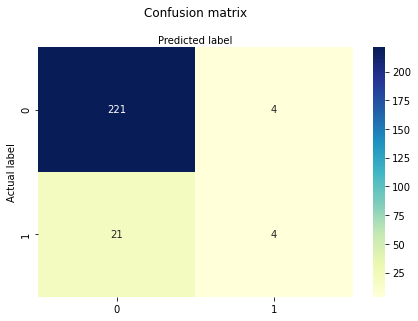

In [225]:
#logistic regression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features_array,side_effect_1_array,test_size=0.30,random_state=0)

from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

In [226]:
#svm
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.88
Precision: 0.35294117647058826
Recall: 0.24


In [234]:
#knn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[224   1]
 [ 21   4]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       225
           1       0.80      0.16      0.27        25

    accuracy                           0.91       250
   macro avg       0.86      0.58      0.61       250
weighted avg       0.90      0.91      0.88       250



In [235]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

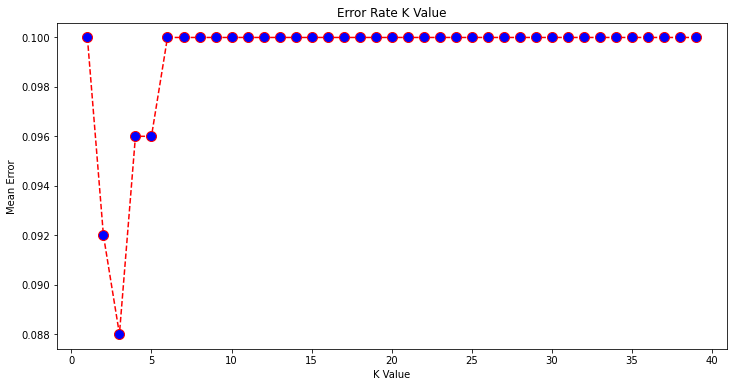

In [236]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [327]:
Targets

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [330]:
Targets_df.columns=["Tg"+str(i) for i in range(1, 787)]

In [331]:
Targets_df

,Tg1,Tg2,Tg3,Tg4,Tg5,Tg6,Tg7,Tg8,Tg9,Tg10,...,Tg777,Tg778,Tg779,Tg780,Tg781,Tg782,Tg783,Tg784,Tg785,Tg786
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
drug_to_Tg_matrix = pd.DataFrame(columns=['drug', 'Tg'])
#create a matrix of drugs-to-targets
#two columns: drugs labeled 0-831, SE labeled Tg1-Tg786
for i in range (1, 787):
    column = 'Tg'+str(i)
    count = 0
    for j in Targets_df[column]:
        if j == 1:
            add = pd.DataFrame({'drug':[count], 'Tg':[column]})
            drug_to_Tg_matrix = pd.concat([drug_to_Tg_matrix, add], axis=0)
        count += 1

In [333]:
drug_to_Tg_matrix

,drug,Tg
0,190,Tg1
0,247,Tg1
0,374,Tg1
0,675,Tg1
0,814,Tg1
...,...,...
0,657,Tg783
0,795,Tg783
0,383,Tg784
0,520,Tg785


In [397]:
for i in range (1, 832):
    if i not in list(drug_to_Tg_matrix['drug']):
        print (i)

42
46
74
79
129
175
218
219
295
321
326
432
494
519
603
648
679
685
747


In [407]:
drug_to_SE_matrix

,drug,SE
0,7,SE1
0,30,SE1
0,33,SE1
0,35,SE1
0,39,SE1
...,...,...
0,749,SE1383
0,773,SE1383
0,776,SE1383
0,542,SE1384


In [408]:
G_drug_Tg = nx.Graph()
G_drug_Tg.add_nodes_from(drug_to_SE_matrix['drug'], bipartite='drug')
G_drug_Tg.add_nodes_from(drug_to_Tg_matrix['Tg'], bipartite='Tg')
G_drug_Tg.add_edges_from(zip(drug_to_Tg_matrix['drug'], drug_to_Tg_matrix['Tg'])) 

In [409]:
G_drug_Tg

In [410]:
N, K = G_drug_Tg.order(), G_drug_Tg.size()
avg_deg = float(K) / N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  1617
Edges:  2860
Average degree:  1.7687074829931972


In [411]:
drug_nodes = [n for n in G_drug_Tg.nodes() if G_drug_Tg.nodes[n]['bipartite'] == 'drug'] 
Tg_nodes = [n for n in G_drug_Tg.nodes() if G_drug_Tg.nodes[n]['bipartite'] == 'Tg'] 

In [413]:
len(drug_nodes)

832

In [414]:
G_drug_on_Tg = nx.algorithms.bipartite.projection.weighted_projected_graph(G_drug_Tg, drug_nodes)

In [416]:
N, K = G_drug_on_Tg.order(), G_drug_on_Tg.size()
avg_deg = float(K) / N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  832
Edges:  9967
Average degree:  11.979567307692308


In [436]:
degree_centrality = list((nx.algorithms.centrality.degree_centrality(G_drug_on_Tg)).values())

In [437]:
len(degree_centrality)

832

In [439]:
degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_Tg)

In [440]:
degree_centrality_sorted = {}
for i in range(0, 832):
    degree_centrality_sorted[i] = degree_centrality[i]

In [443]:
degree_centrality_sorted_value = degree_centrality_sorted.values()

In [445]:
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

In [446]:
from sklearn import preprocessing
standard = preprocessing.scale(degree_centrality_sorted_value)

In [924]:
standard

array([-5.84567975e-01, -5.11309871e-01,  4.04416435e-01, -5.11309871e-01,
        8.80594113e-01, -8.77600393e-01,  1.06373937e+00, -4.01422714e-01,
       -4.74680818e-01,  2.57900226e-01,  1.13699748e+00,  2.57900226e-01,
       -8.04342288e-01, -1.45019349e-01, -8.77600393e-01, -6.57826079e-01,
       -4.74680818e-01,  1.94283663e+00, -1.45019349e-01, -2.18277453e-01,
       -6.94455132e-01, -1.81648401e-01, -8.40971340e-01, -6.94455132e-01,
       -6.57826079e-01, -7.67713236e-01,  3.31158330e-01, -8.40971340e-01,
        5.14303591e-01, -4.01422714e-01, -5.47938923e-01,  9.90481270e-01,
       -6.94455132e-01, -2.91535557e-01,  1.17362653e+00,  3.81259125e-02,
       -4.38051766e-01, -6.21197027e-01, -7.67713236e-01, -8.04342288e-01,
       -7.67713236e-01, -1.81648401e-01, -8.77600393e-01,  7.70706957e-01,
       -6.21197027e-01,  9.90481270e-01, -8.77600393e-01, -8.77600393e-01,
       -6.94455132e-01,  4.58012839e+00,  4.58012839e+00, -8.40971340e-01,
        4.77674539e-01,  

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc8542865b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc839e42b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc84b6a4b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc839e42670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc838c514f0>],
 'means': []}

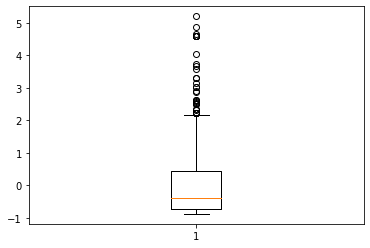

In [925]:
plt.boxplot(standard)

In [422]:
side_effect_1_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [423]:
len(features_array[0])

2892

In [467]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=10)
new_data = pca_breast.fit_transform(features_array)

In [373]:
len(new_data)

832

In [458]:
fewturs_centrality = pd.DataFrame(data=new_data)

In [459]:
fewturs_centrality['centrality'] = list(standard)

In [460]:
fewturs_centrality

,0,1,2,3,4,centrality
0,2.243359,-3.243750,0.464370,-0.784683,2.527105,-0.584568
1,0.183050,-1.580306,-0.378157,-0.468541,3.314444,-0.511310
2,2.250186,1.692000,-2.770573,0.813478,0.961142,0.404416
3,-1.099856,5.468633,4.742379,-0.996089,-0.248948,-0.511310
4,-0.373342,-3.386503,-0.653785,0.375043,-0.013726,0.880594
...,...,...,...,...,...,...
827,-0.573835,-3.580396,-0.987107,-1.924059,-2.584477,-0.840971
828,2.867740,-2.913638,0.912124,0.205204,1.212453,1.356772
829,3.570952,3.609016,-2.051077,1.711535,-2.500252,0.294529
830,-0.507310,-3.619974,-1.414899,2.320918,-0.723687,-0.840971


Accuracy: 0.9
Precision: 0.0
Recall: 0.0


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


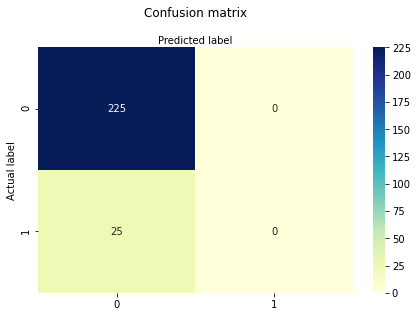

In [465]:
#logistic regression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_centrality,side_effect_1_array,test_size=0.30,random_state=0)

from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

In [587]:
features = pd.DataFrame(data=new_data)

In [588]:
features

,0,1,2,3,4,5,6,7,8,9
0,2.243359,-3.243750,0.464372,-0.784694,2.527015,0.005307,1.158614,1.718700,0.227790,-1.769117
1,0.183050,-1.580306,-0.378156,-0.468509,3.314537,-1.100180,1.757688,-1.383645,-0.227021,0.878938
2,2.250186,1.692000,-2.770571,0.813528,0.960974,-0.955266,-1.495596,-0.871777,0.320783,-0.503168
3,-1.099856,5.468633,4.742379,-0.996102,-0.248938,0.068207,0.560139,-1.393341,1.107069,-0.232342
4,-0.373342,-3.386503,-0.653786,0.375010,-0.013734,0.091682,1.576827,-1.227879,-0.540254,1.660483
...,...,...,...,...,...,...,...,...,...,...
827,-0.573835,-3.580396,-0.987106,-1.924042,-2.584535,2.174874,-0.346288,-0.354639,-0.291941,0.782748
828,2.867740,-2.913638,0.912123,0.205154,1.212388,-0.735016,-2.484966,-0.190294,0.370265,-1.752643
829,3.570952,3.609016,-2.051076,1.711572,-2.500285,-0.340381,1.091676,-0.912787,3.379336,0.657763
830,-0.507310,-3.619974,-1.414899,2.320921,-0.723557,1.959412,-0.222004,-0.813741,1.745983,0.740814


In [589]:
count =0
for i in side_effect_1:
    if i==1:
        print (count)
    count+=1

24
25
34
48
50
56
61
67
75
77
83
84
85
89
134
137
146
160
201
217
222
240
252
259
261
266
271
297
303
305
312
330
346
355
386
408
411
420
425
454
464
468
485
498
503
509
527
539
549
551
565
575
578
583
604
615
618
642
675
676
685
689
704
707
717
724
728
737
757
781
788
789
792
803
809
821
826


In [569]:
features.iloc[1]

0    0.183050
1   -1.580306
2   -0.378156
3   -0.468509
4    3.314537
5   -1.100180
6    1.757688
7   -1.383645
8   -0.227021
9    0.878938
Name: 1, dtype: float64

In [590]:
for i in range (0, 832):
    value = list(side_effect_1)[i]
    if value == 1:
        add_row = features.iloc[i]
        add_row_df = pd.DataFrame(data=add_row)
        add_row_df = add_row_df.T
        features = pd.concat([features, add_row_df], axis=0)
        features = pd.concat([features, add_row_df], axis=0)
        features = pd.concat([features, add_row_df], axis=0)
        features = pd.concat([features, add_row_df], axis=0)
        features = pd.concat([features, add_row_df], axis=0)
        features = pd.concat([features, add_row_df], axis=0)

In [591]:
features

,0,1,2,3,4,5,6,7,8,9
0,2.243359,-3.243750,0.464372,-0.784694,2.527015,0.005307,1.158614,1.718700,0.227790,-1.769117
1,0.183050,-1.580306,-0.378156,-0.468509,3.314537,-1.100180,1.757688,-1.383645,-0.227021,0.878938
2,2.250186,1.692000,-2.770571,0.813528,0.960974,-0.955266,-1.495596,-0.871777,0.320783,-0.503168
3,-1.099856,5.468633,4.742379,-0.996102,-0.248938,0.068207,0.560139,-1.393341,1.107069,-0.232342
4,-0.373342,-3.386503,-0.653786,0.375010,-0.013734,0.091682,1.576827,-1.227879,-0.540254,1.660483
...,...,...,...,...,...,...,...,...,...,...
826,-0.717568,-3.708585,-0.951777,2.570738,-0.234145,2.196207,-0.012818,-0.962410,-0.413703,0.331303
826,-0.717568,-3.708585,-0.951777,2.570738,-0.234145,2.196207,-0.012818,-0.962410,-0.413703,0.331303
826,-0.717568,-3.708585,-0.951777,2.570738,-0.234145,2.196207,-0.012818,-0.962410,-0.413703,0.331303
826,-0.717568,-3.708585,-0.951777,2.570738,-0.234145,2.196207,-0.012818,-0.962410,-0.413703,0.331303


In [592]:
len(side_effect_1_array)

1063

In [595]:
for i in range(0, 77):
    side_effect_1_array = np.append (side_effect_1_array, 1)

In [596]:
len(side_effect_1_array)

1294

In [648]:
features

,0,1,2,3,4,5,6,7,8,9
0,2.243359,-3.243750,0.464372,-0.784694,2.527015,0.005307,1.158614,1.718700,0.227790,-1.769117
1,0.183050,-1.580306,-0.378156,-0.468509,3.314537,-1.100180,1.757688,-1.383645,-0.227021,0.878938
2,2.250186,1.692000,-2.770571,0.813528,0.960974,-0.955266,-1.495596,-0.871777,0.320783,-0.503168
3,-1.099856,5.468633,4.742379,-0.996102,-0.248938,0.068207,0.560139,-1.393341,1.107069,-0.232342
4,-0.373342,-3.386503,-0.653786,0.375010,-0.013734,0.091682,1.576827,-1.227879,-0.540254,1.660483
...,...,...,...,...,...,...,...,...,...,...
826,-0.717568,-3.708585,-0.951777,2.570738,-0.234145,2.196207,-0.012818,-0.962410,-0.413703,0.331303
826,-0.717568,-3.708585,-0.951777,2.570738,-0.234145,2.196207,-0.012818,-0.962410,-0.413703,0.331303
826,-0.717568,-3.708585,-0.951777,2.570738,-0.234145,2.196207,-0.012818,-0.962410,-0.413703,0.331303
826,-0.717568,-3.708585,-0.951777,2.570738,-0.234145,2.196207,-0.012818,-0.962410,-0.413703,0.331303


Accuracy: 0.6111111111111112
Precision: 0.4915254237288136
Recall: 0.232
F1-Score: 0.31521739130434784


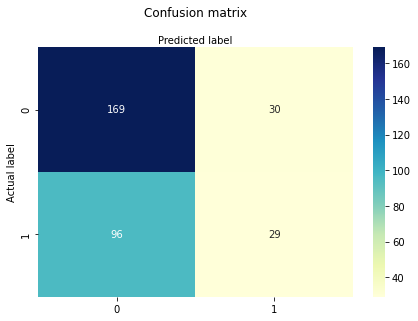

In [671]:
#logistic regression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,side_effect_1_array,test_size=0.25)

from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
Precision = metrics.precision_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
F1 = 2*Precision*Recall / (Precision+Recall)
print ('F1-Score:', F1)

In [668]:
index = list (features.index)

In [604]:
index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [615]:
tandard_centrality_full = []
for i in index:
    tandard_centrality_full.append(standard[i])

In [616]:
len(tandard_centrality_full)

1294

In [618]:
tandard_centrality_full_df

,0
0,-0.584568
1,-0.511310
2,0.404416
3,-0.511310
4,0.880594
...,...
1289,-0.694455
1290,-0.694455
1291,-0.694455
1292,-0.694455


In [631]:
features_reset=features.reset_index()

In [630]:
features_reset = features_reset[1:10]

In [639]:
features_reset = features_reset.drop(['index'], axis=1)

In [640]:
features_reset

,0,1,2,3,4,5,6,7,8,9
0,2.243359,-3.243750,0.464372,-0.784694,2.527015,0.005307,1.158614,1.718700,0.227790,-1.769117
1,0.183050,-1.580306,-0.378156,-0.468509,3.314537,-1.100180,1.757688,-1.383645,-0.227021,0.878938
2,2.250186,1.692000,-2.770571,0.813528,0.960974,-0.955266,-1.495596,-0.871777,0.320783,-0.503168
3,-1.099856,5.468633,4.742379,-0.996102,-0.248938,0.068207,0.560139,-1.393341,1.107069,-0.232342
4,-0.373342,-3.386503,-0.653786,0.375010,-0.013734,0.091682,1.576827,-1.227879,-0.540254,1.660483
...,...,...,...,...,...,...,...,...,...,...
1289,-0.717568,-3.708585,-0.951777,2.570738,-0.234145,2.196207,-0.012818,-0.962410,-0.413703,0.331303
1290,-0.717568,-3.708585,-0.951777,2.570738,-0.234145,2.196207,-0.012818,-0.962410,-0.413703,0.331303
1291,-0.717568,-3.708585,-0.951777,2.570738,-0.234145,2.196207,-0.012818,-0.962410,-0.413703,0.331303
1292,-0.717568,-3.708585,-0.951777,2.570738,-0.234145,2.196207,-0.012818,-0.962410,-0.413703,0.331303


In [642]:
features_centrality = pd.concat([features_reset, tandard_centrality_full_df], axis=1)

In [716]:
def run_centrality():#logistic regression
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(features_centrality,side_effect_1_array,test_size=0.25)

    from sklearn.linear_model import LogisticRegression

    # instantiate the model (using the default parameters)
    logreg = LogisticRegression()

    # fit the model with data
    logreg.fit(X_train,y_train)

    #
    y_pred=logreg.predict(X_test)

    # import the metrics class
    from sklearn import metrics
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    cnf_matrix

    # import required modules
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline

    #class_names=[0,1] # name  of classes
    #fig, ax = plt.subplots()
    #tick_marks = np.arange(len(class_names))
    #plt.xticks(tick_marks, class_names)
    #plt.yticks(tick_marks, class_names)
    # create heatmap
    #sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    #ax.xaxis.set_label_position("top")
    #plt.tight_layout()
    #plt.title('Confusion matrix', y=1.1)
    #plt.ylabel('Actual label')
    #plt.xlabel('Predicted label')

    #print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    #print("Precision:",metrics.precision_score(y_test, y_pred))
    #print("Recall:",metrics.recall_score(y_test, y_pred))
    Accuracy = metrics.accuracy_score(y_test, y_pred)
    Precision = metrics.precision_score(y_test, y_pred)
    Recall = metrics.recall_score(y_test, y_pred)
    F1 = 2*Precision*Recall / (Precision+Recall)
    return F1, Precision, Recall, Accuracy
    #print ('F1-Score:', F1)

In [720]:
def run():#logistic regression
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(features,side_effect_1_array,test_size=0.25)

    from sklearn.linear_model import LogisticRegression

    # instantiate the model (using the default parameters)
    logreg = LogisticRegression()

    # fit the model with data
    logreg.fit(X_train,y_train)

    #
    y_pred=logreg.predict(X_test)

    # import the metrics class
    from sklearn import metrics
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    cnf_matrix

    # import required modules
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline

    #class_names=[0,1] # name  of classes
    #fig, ax = plt.subplots()
    #tick_marks = np.arange(len(class_names))
    #plt.xticks(tick_marks, class_names)
    #plt.yticks(tick_marks, class_names)
    # create heatmap
    #sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    #ax.xaxis.set_label_position("top")
    #plt.tight_layout()
    #plt.title('Confusion matrix', y=1.1)
    #plt.ylabel('Actual label')
    #plt.xlabel('Predicted label')

    #print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    #print("Precision:",metrics.precision_score(y_test, y_pred))
    #print("Recall:",metrics.recall_score(y_test, y_pred))
    Accuracy = metrics.accuracy_score(y_test, y_pred)
    Precision = metrics.precision_score(y_test, y_pred)
    Recall = metrics.recall_score(y_test, y_pred)
    F1 = 2*Precision*Recall / (Precision+Recall)
    return F1, Precision, Recall, Accuracy
    #print ('F1-Score:', F1)

In [722]:
averageF1 = 0
AVGPrecision = 0
AVGRecall = 0
AVFAccuracy = 0
for i in range (1, 100):
    F1, Precision, Recall, Accuracy = run()
    averageF1 = averageF1 + F1
    AVGPrecision = AVGPrecision + Precision
    AVGRecall = AVGRecall + Recall
    AVFAccuracy = AVFAccuracy + Accuracy
print (averageF1/99)
print (AVGPrecision/99)
print (AVGRecall/99)
print (AVFAccuracy/99)

0.2898692787426721
0.4852783337244218
0.21098074671080405
0.5753522883152514


In [723]:
averageF1 = 0
AVGPrecision = 0
AVGRecall = 0
AVFAccuracy = 0
for i in range (1, 100):
    F1, Precision, Recall, Accuracy = run_centrality()
    averageF1 = averageF1 + F1
    AVGPrecision = AVGPrecision + Precision
    AVGRecall = AVGRecall + Recall
    AVFAccuracy = AVFAccuracy + Accuracy
print (averageF1/99)
print (AVGPrecision/99)
print (AVGRecall/99)
print (AVFAccuracy/99)

0.30331119909950294
0.5091897368897808
0.2213842249515347
0.5842686120463898


In [ ]:
side_effect = data_set['side_effect']
chemical = data_set['chemical']
Targets = data_set['Targets']
Transporters = data_set['Transporters']
Enzymes = data_set['Enzymes']
Pathways = data_set['Pathways']
Treatment = data_set['Treatment']
Other_side_effects = data_set['Other_side_effects']

In [775]:
side_effect

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [808]:
side_effect_df = pd.DataFrame(data = side_effect)

In [809]:
count_of_SE = list(side_effect_df.sum(axis = 0))

In [810]:
count_of_SE_df = pd.DataFrame(data = count_of_SE)

In [811]:
count_of_SE_df = count_of_SE_df.T

In [812]:
Count = pd.concat([side_effect_df, count_of_SE_df], axis=0)

In [813]:
Count

,0,1,2,3,4,5,6,7,8,9,...,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
830,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


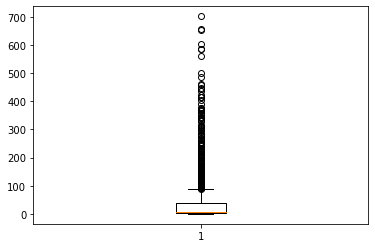

In [741]:
import matplotlib.pyplot as plt
plt.boxplot(count_of_SE)
plt.show()

In [746]:
import statistics
statistics.median(count_of_SE)

8

In [842]:
index = 0
count = 0
list_of_index = []
for i in count_of_SE:
    if i>100:
        count+=1
        list_of_index.append(index)
    index+=1
print (count, list_of_index)

176 [2, 19, 27, 32, 35, 36, 37, 38, 47, 49, 51, 53, 63, 67, 68, 74, 76, 78, 81, 84, 110, 113, 145, 150, 169, 173, 176, 177, 179, 182, 189, 194, 199, 201, 202, 207, 208, 211, 217, 224, 225, 227, 229, 240, 241, 243, 244, 246, 249, 250, 263, 266, 274, 275, 277, 283, 285, 295, 300, 309, 311, 321, 322, 324, 333, 341, 344, 346, 349, 352, 354, 355, 369, 375, 380, 398, 417, 427, 429, 440, 443, 445, 447, 448, 455, 458, 463, 471, 473, 482, 495, 508, 543, 549, 575, 587, 597, 600, 608, 615, 624, 649, 651, 653, 654, 663, 664, 684, 688, 691, 698, 711, 734, 741, 743, 750, 765, 782, 797, 802, 806, 809, 816, 826, 829, 835, 842, 843, 844, 847, 861, 862, 873, 883, 888, 892, 894, 899, 900, 902, 907, 910, 912, 919, 925, 934, 938, 939, 942, 945, 953, 955, 962, 964, 967, 985, 1011, 1032, 1033, 1036, 1038, 1041, 1117, 1119, 1169, 1241, 1249, 1253, 1268, 1271, 1278, 1307, 1321, 1324, 1346, 1378]


In [804]:
count_of_SE

[54,
 85,
 457,
 21,
 9,
 2,
 63,
 1,
 61,
 6,
 3,
 27,
 7,
 11,
 1,
 1,
 13,
 1,
 1,
 228,
 77,
 2,
 8,
 1,
 15,
 5,
 13,
 314,
 15,
 87,
 77,
 1,
 131,
 4,
 6,
 277,
 339,
 129,
 152,
 2,
 33,
 9,
 15,
 1,
 0,
 2,
 13,
 187,
 1,
 263,
 4,
 421,
 12,
 339,
 3,
 1,
 5,
 48,
 5,
 88,
 8,
 9,
 11,
 281,
 5,
 8,
 11,
 355,
 158,
 1,
 22,
 1,
 36,
 1,
 360,
 5,
 181,
 1,
 185,
 27,
 4,
 134,
 25,
 70,
 299,
 8,
 33,
 11,
 10,
 6,
 1,
 4,
 1,
 2,
 3,
 55,
 6,
 5,
 8,
 39,
 60,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 64,
 5,
 161,
 2,
 7,
 189,
 2,
 12,
 1,
 45,
 48,
 23,
 56,
 93,
 7,
 61,
 49,
 1,
 1,
 39,
 1,
 15,
 9,
 1,
 1,
 17,
 1,
 1,
 1,
 75,
 2,
 4,
 34,
 26,
 35,
 1,
 33,
 101,
 4,
 4,
 4,
 3,
 330,
 9,
 10,
 8,
 9,
 14,
 2,
 52,
 58,
 3,
 1,
 3,
 5,
 1,
 4,
 1,
 8,
 3,
 3,
 119,
 15,
 6,
 1,
 121,
 15,
 5,
 368,
 226,
 83,
 444,
 58,
 13,
 173,
 2,
 3,
 17,
 16,
 41,
 1,
 352,
 6,
 2,
 4,
 1,
 115,
 64,
 5,
 1,
 88,
 162,
 3,
 183,
 150,
 79,
 31,
 36,
 1,
 191,
 153,
 27,
 23,
 101,
 40,
 8

In [814]:
index = 0
for i in count_of_SE:
    if i>100:
        side_effect_df = side_effect_df.drop(index, axis=1)
    index+=1
print (index)

1385


In [815]:
side_effect_df

,0,1,3,4,5,6,7,8,9,10,...,1374,1375,1376,1377,1379,1380,1381,1382,1383,1384
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [913]:
import pandas
drug_to_SE_matrix = pandas.read_csv('drug_to_SE_matrix.csv')
drug_to_SE_matrix = drug_to_SE_matrix.drop(['Unnamed: 0'], axis = 1)

In [914]:
drug_to_SE_matrix

,drug,SE
0,7,SE1
1,30,SE1
2,33,SE1
3,35,SE1
4,39,SE1
...,...,...
59200,749,SE1383
59201,773,SE1383
59202,776,SE1383
59203,542,SE1384


In [915]:
index = 0
count = 0
list_of_index = []
for i in count_of_SE:
    if i>1:
        count+=1
        list_of_index.append(index)
    index+=1



for index, row in drug_to_SE_matrix.iterrows():
    SEindex = int(row['SE'][-1])
    if SEindex in list_of_index:
        drug_to_SE_matrix = drug_to_SE_matrix.drop(index, axis = 0)

In [916]:
print (count)

1109


In [917]:
drug_to_SE_matrix

,drug,SE
628,25,SE7
629,35,SE7
630,41,SE7
631,47,SE7
632,50,SE7
...,...,...
58564,415,SE1367
58565,508,SE1367
58566,541,SE1367
58567,622,SE1367


In [918]:
G = nx.Graph()
G.add_nodes_from(drug_to_SE_matrix['drug'], bipartite='drug')
G.add_nodes_from(drug_to_SE_matrix['SE'], bipartite='SE')
G.add_edges_from(zip(drug_to_SE_matrix['drug'], drug_to_SE_matrix['SE'])) 

In [919]:
N, K = G.order(), G.size()
avg_deg = float(K) / N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  903
Edges:  4945
Average degree:  5.476190476190476


In [920]:
drug_nodes = [n for n in G.nodes() if G.nodes[n]['bipartite'] == 'drug'] 
SE_nodes = [n for n in G.nodes() if G.nodes[n]['bipartite'] == 'SE'] 

In [921]:
G_drug = nx.algorithms.bipartite.projection.weighted_projected_graph(G, drug_nodes)

In [922]:
N, K = G_drug.order(), G_drug.size()
avg_deg = float(K) / N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  765
Edges:  247174
Average degree:  323.1032679738562


In [923]:
degree_centrality = list((nx.algorithms.centrality.degree_centrality(G_drug)).values())
degree_centrality

[0.9698952879581152,
 0.9672774869109948,
 0.9607329842931938,
 0.9450261780104713,
 0.9659685863874347,
 0.9476439790575917,
 0.9541884816753927,
 0.9502617801047121,
 0.9738219895287958,
 0.962041884816754,
 0.9502617801047121,
 0.9358638743455497,
 0.9856020942408378,
 0.9646596858638744,
 0.9633507853403142,
 0.9005235602094241,
 0.9541884816753927,
 0.1780104712041885,
 0.9581151832460734,
 0.9646596858638744,
 0.8350785340314136,
 0.9764397905759163,
 0.9725130890052357,
 0.9712041884816754,
 0.8664921465968587,
 0.9568062827225131,
 0.9698952879581152,
 0.93717277486911,
 0.9725130890052357,
 0.9607329842931938,
 0.7630890052356022,
 0.9515706806282723,
 0.9267015706806283,
 0.9698952879581152,
 0.9751308900523561,
 0.8900523560209425,
 0.9672774869109948,
 0.9005235602094241,
 0.9659685863874347,
 0.9607329842931938,
 0.8874345549738221,
 0.9136125654450262,
 0.9751308900523561,
 0.9633507853403142,
 0.8795811518324608,
 0.9725130890052357,
 0.7133507853403142,
 0.9568062827225

In [1]:
eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)

NameError: name 'd' is not defined

In [3]:
G_drug

NameError: name 'G_drug' is not defined